# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD'
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=USD'

In [6]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f'The current value of your {my_btc} BTC is ${my_btc_value:0.2f}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value:0.2f}')

The current value of your 1.2 BTC is $23699.77
The current value of your 5.3 ETH is $8238.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# alpaca_api_key = ALPACA_API_KEY
# alpaca_secret_key = ALPACA_SECRET_KEY

#base_url = 'https://paper-api.alpaca.markets'
base_url = 'https://app.alpaca.markets'

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, base_url, api_version='v2')
### UNSURE IF THIS IS THE CORRECT BASE URL

In [14]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.79  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.68   75250412      422688  287.989956

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments['AGG']['close'][0])
spy_close_price = float(df_investments['SPY']['close'][0])

# Print AGG and SPY close prices
print(f'Current AGG closing price: ${agg_close_price}')
print(f'Current SPY closing price: ${spy_close_price}')

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f'The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}')
print(f'The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}')

The current value of your 50 SPY shares is $14139.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,31937.827
shares,37513.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

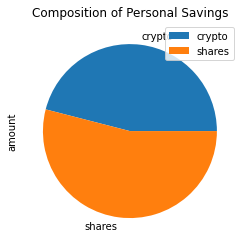

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.')
else:
    print(f'You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [23]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 110.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 120.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 130.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 140.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 150.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 160.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 170.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 180.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 190.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 200.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 210.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 220.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 230.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 240.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 250.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 260.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 270.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 280.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 290.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 300.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 310.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 320.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 330.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 340.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 350.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 360.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 370.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 380.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 390.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 400.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 410.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 420.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 430.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 440.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 450.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 460.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 470.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 480.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 490.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998601,0.990376,0.996838,1.003229,1.000036,1.000492,0.980592,1.005263,1.004491,0.998393,...,1.001884,0.998264,1.001591,0.995183,0.998770,1.001712,1.007355,0.999627,0.988416,1.004698
2,0.998537,0.995300,0.995635,1.005220,1.002965,1.002876,0.988503,1.004340,1.006626,1.002336,...,0.985597,0.995235,1.001163,0.988607,1.010371,1.001607,1.006987,0.999909,0.991315,0.997837
3,0.994597,1.012152,1.002250,1.009985,0.990299,1.010408,0.993055,1.005858,1.006765,0.995935,...,0.990336,1.002662,1.013232,0.983472,1.010946,1.008275,0.997626,1.002450,1.001827,0.994497
4,0.979976,1.015028,1.000910,1.007633,0.985576,1.017023,0.999408,1.002859,0.998548,1.004130,...,0.986867,0.997329,1.022657,0.983254,1.014949,1.013402,0.995186,0.993055,1.002883,0.994157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.911384,10.783268,27.952402,42.330972,8.979043,18.671585,15.614772,14.789675,45.004632,22.777795,...,25.417988,39.958637,12.690612,8.725330,21.826211,11.639807,9.169903,8.092899,14.077582,21.534805
7557,6.953652,10.865299,27.661944,42.321268,8.943013,18.725305,15.438665,14.777940,44.720968,22.899315,...,25.427425,40.040217,12.740013,8.759831,22.007816,11.620142,9.181510,8.046869,14.043852,21.361508
7558,6.960885,10.868278,27.795288,42.871113,9.063226,18.642836,15.370607,14.854304,45.129526,22.816170,...,25.401429,40.041278,12.864656,8.823878,21.884736,11.564683,9.158378,8.046984,13.969203,21.263696
7559,6.934120,10.828063,27.292154,43.397431,9.031787,18.569962,15.272103,14.833561,44.171461,22.530039,...,25.202124,40.199021,12.964550,8.784266,21.679594,11.634682,9.117765,8.173827,14.052341,21.283453


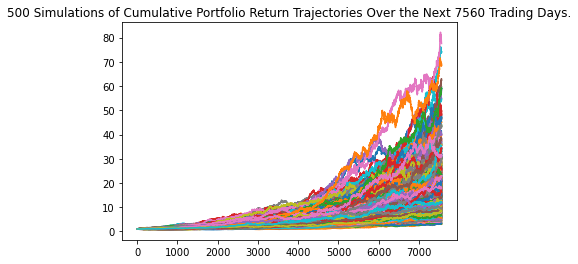

In [32]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

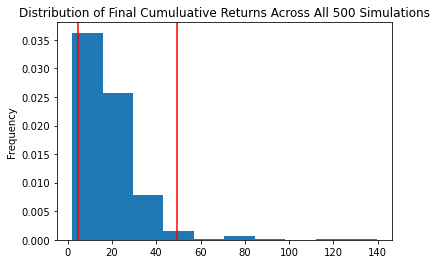

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             19.278852
std              14.263891
min               2.012071
25%              10.359919
50%              15.787231
75%              23.499745
max             139.434969
95% CI Lower      4.870438
95% CI Upper     49.348846
Name: 7560, dtype: float64


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 30 years will end within in the range of'
      f' ${ci_lower} and ${ci_upper}')

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97408.77 and $986976.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 30 years will end within in the range of'
      f' ${ci_lower} and ${ci_upper}')

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $146113.15 and $1480465.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 110.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 120.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 130.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 140.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 150.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 160.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 170.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 180.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 190.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 200.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 210.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 220.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 230.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 240.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 250.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 260.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 270.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 280.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 290.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 300.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 310.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 320.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 330.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 340.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 350.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 360.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 370.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 380.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 390.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 400.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 410.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 420.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 430.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 440.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 450.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 460.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 470.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 480.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

Running Monte Carlo simulation number 490.


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTool

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003639,1.005944,0.992837,0.995667,0.999530,0.993590,1.003163,0.998905,0.999536,1.009668,...,0.998875,0.997820,0.994588,1.003394,1.003786,1.001434,0.997888,0.999803,1.004239,0.996213
2,1.006167,1.012097,0.998918,0.995492,1.004463,0.994052,1.005514,0.995790,1.000419,1.008369,...,1.002032,0.993384,0.995579,1.007224,1.005445,1.005920,1.000153,0.999874,1.010139,0.992013
3,1.007261,1.008411,0.999560,0.995514,1.009805,0.991011,1.007489,0.998209,0.998658,1.004033,...,1.006759,0.998481,0.997395,1.009827,1.008001,1.004725,1.002660,0.998278,1.012185,0.993465
4,1.013070,1.012921,1.002940,0.992667,1.005348,0.989156,1.007908,0.999731,0.993899,1.001343,...,1.004978,1.002442,0.997995,1.011776,1.007180,1.003677,1.000659,1.000813,1.014748,0.994626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.105928,1.100832,1.304449,1.055678,1.230963,1.195595,1.215851,1.171655,1.140492,1.277363,...,1.476996,1.241069,1.125227,1.102713,1.274591,1.146760,1.208340,1.115549,1.219223,1.312544
1257,1.104854,1.097848,1.301157,1.056066,1.228468,1.196389,1.211151,1.174261,1.136307,1.279964,...,1.473736,1.246778,1.132824,1.104288,1.275313,1.154948,1.208895,1.108908,1.217616,1.312726
1258,1.106063,1.094225,1.304303,1.055314,1.229860,1.193184,1.213827,1.169086,1.133356,1.284941,...,1.476087,1.247230,1.136203,1.108650,1.271898,1.155078,1.211614,1.109210,1.213189,1.308631
1259,1.111315,1.091707,1.298107,1.058746,1.233366,1.190887,1.218077,1.167561,1.131561,1.291030,...,1.473881,1.254995,1.142157,1.111703,1.269169,1.148582,1.215181,1.113701,1.206880,1.314682


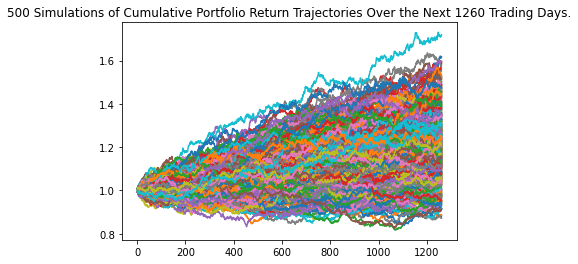

In [39]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

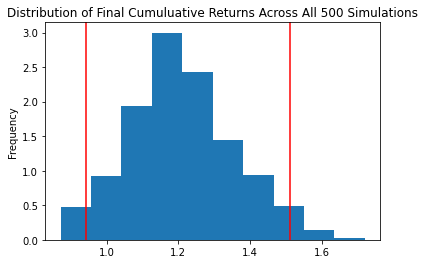

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.198449
std               0.140681
min               0.863651
25%               1.099821
50%               1.188348
75%               1.277007
max               1.649365
95% CI Lower      0.948421
95% CI Upper      1.514185
Name: 1260, dtype: float64


C:\Users\const\Documents\Python Bootcamp\projects\Fintech_planner\Fintech_Planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [42]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 5 years will end within in the range of'
      f' ${ci_lower_five} and ${ci_upper_five}')

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57440.3 and $89031.2


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002343,0.998680,1.004754,0.999618,1.003445,1.001643,0.999766,1.001990,0.998108,0.997213,...,1.003578,0.998516,1.000768,0.992748,1.004588,1.000558,0.998464,1.004201,1.001197,0.998873
2,1.001658,0.993388,1.002621,0.992083,1.000306,1.003693,1.001510,1.008434,0.993213,0.994968,...,1.000079,0.997735,1.003343,0.986486,1.001970,1.002366,1.001058,1.002707,0.994871,0.996150
3,1.001606,0.991666,1.007980,0.996347,0.996236,1.005252,0.999899,1.006405,0.991281,0.994454,...,1.000829,0.993594,1.006770,0.986251,0.997090,1.002478,0.997425,1.004489,1.002463,0.992947
4,1.009672,0.984117,1.005205,0.999408,0.993933,1.008267,0.997828,1.008093,0.987644,0.986282,...,1.002020,0.994334,1.002509,0.993043,1.003866,1.000548,0.995978,1.001381,0.999704,0.989606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.264609,1.253442,2.054456,1.642455,1.477693,1.028491,1.332465,1.527253,1.519823,1.316045,...,1.365913,1.466546,1.279784,1.308843,1.614442,1.370495,1.598428,1.977942,1.212922,1.470767
2517,1.262145,1.261802,2.039037,1.649328,1.483808,1.028064,1.337292,1.535083,1.522954,1.313405,...,1.367229,1.465759,1.278970,1.306832,1.612563,1.371496,1.595330,1.975861,1.206553,1.476363
2518,1.261639,1.262705,2.037661,1.650318,1.489282,1.021440,1.329723,1.533811,1.527723,1.314474,...,1.370071,1.468931,1.287806,1.307890,1.604365,1.370361,1.593383,1.971956,1.201261,1.469175
2519,1.259202,1.267029,2.032617,1.650895,1.492714,1.023745,1.324552,1.530122,1.524207,1.309048,...,1.369700,1.472013,1.286553,1.309746,1.610473,1.369380,1.595283,1.980598,1.196653,1.468133


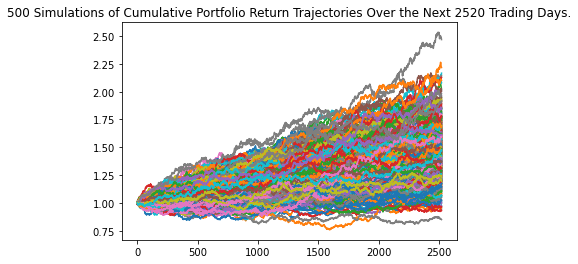

In [45]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

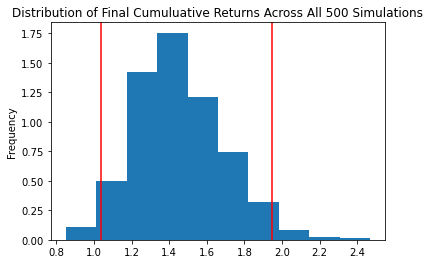

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.456871
std               0.238536
min               0.849550
25%               1.284389
50%               1.439658
75%               1.619096
max               2.468544
95% CI Lower      1.036413
95% CI Upper      1.947946
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment,2)
ci_upper_ten = round(tbl_ten[9] * initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 10 years will end within in the range of'
      f' ${ci_lower_ten} and ${ci_upper_ten}')

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62184.76 and $116876.74
